<a href="https://colab.research.google.com/github/ayeshabaig/Pytorch_Fashion_MNIST/blob/master/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0330901488757083
Training loss: 0.5605125179740665
Training loss: 0.489968909113519


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[2.3051e-06, 2.8886e-07, 5.5645e-06, 1.1207e-06, 4.0320e-06, 1.0624e-01,
         6.2821e-06, 3.2345e-01, 6.4055e-03, 5.6388e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([2.3050950e-06, 2.8885788e-07, 5.5644973e-06, 1.1206828e-06,
       4.0320292e-06, 1.0624298e-01, 6.2820591e-06, 3.2345253e-01,
       6.4055435e-03, 5.6387937e-01], dtype=float32)

<BarContainer object of 10 artists>

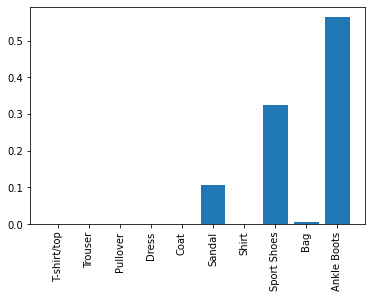

In [8]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

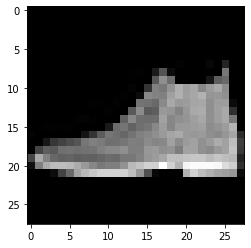

In [9]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [10]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[2.3051e-06, 2.8886e-07, 5.5645e-06, 1.1207e-06, 4.0320e-06, 1.0624e-01,
         6.2821e-06, 3.2345e-01, 6.4055e-03, 5.6388e-01],
        [1.2397e-03, 4.2056e-05, 8.9684e-01, 1.9302e-04, 1.8025e-02, 9.2521e-06,
         8.2854e-02, 5.5568e-09, 7.9452e-04, 3.7783e-07],
        [3.3477e-05, 9.9974e-01, 3.0429e-05, 1.1762e-04, 7.2658e-05, 2.6182e-08,
         2.3471e-07, 6.9006e-07, 8.3237e-09, 1.2988e-08],
        [8.5602e-06, 9.9946e-01, 3.6512e-05, 4.4672e-04, 4.7825e-05, 1.9076e-07,
         1.7559e-07, 3.0357e-06, 1.6161e-08, 8.9395e-08],
        [1.4137e-01, 4.8202e-04, 1.4513e-01, 1.4251e-02, 1.0436e-02, 2.2394e-04,
         6.7884e-01, 1.1804e-06, 9.2477e-03, 1.0730e-05],
        [4.1209e-03, 9.8321e-01, 9.1219e-04, 2.7904e-03, 8.7960e-03, 6.3795e-07,
         1.5992e-04, 5.0648e-06, 2.2776e-06, 3.3882e-07],
        [2.5803e-02, 9.8072e-04, 5.6244e-02, 1.4162e-03, 6.8839e-01, 1.2566e-04,
         2.2351e-01, 1.1364e-06, 3.5361e-03, 1.4898e-06],
        [7.5081e-03, 2.2189

In [11]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [12]:
pred, labels

(tensor([3, 0, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [13]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [14]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 82.09% 
